In [36]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
path = r'E:\Krishna Naik\titanic_train.csv'
train = pd.read_csv(path)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
train1 = train.isnull().sum().max()
train1

687

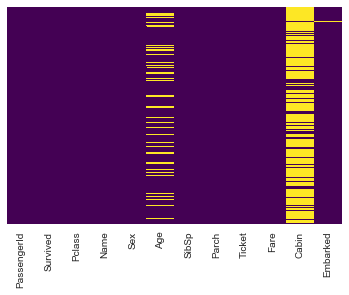

In [39]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')

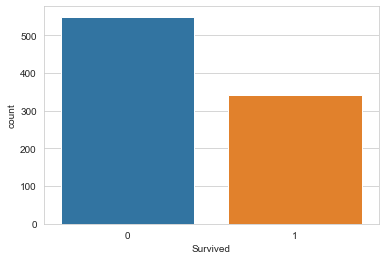

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data = train)

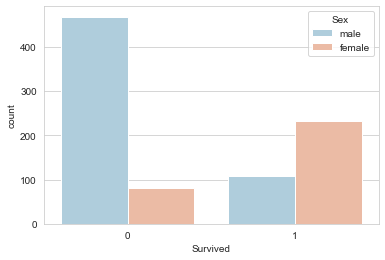

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Sex',data = train,palette = 'RdBu_r')

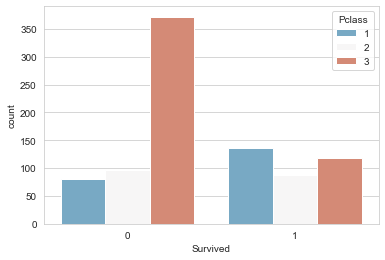

In [42]:
sns.countplot(x='Survived',hue = 'Pclass',data = train,palette = 'RdBu_r')

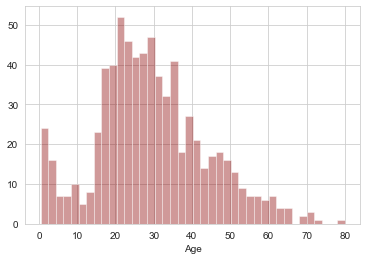

In [43]:
sns.distplot(train['Age'].dropna(),kde = False,color = 'darkred',bins = 40)

# sns.countplot(x='SibSp',data = train)

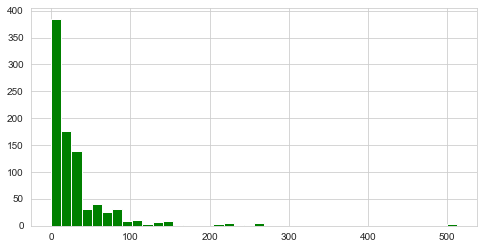

In [44]:
train['Fare'].hist(color = 'green',bins = 40,figsize = (8,4))

# Box Plot

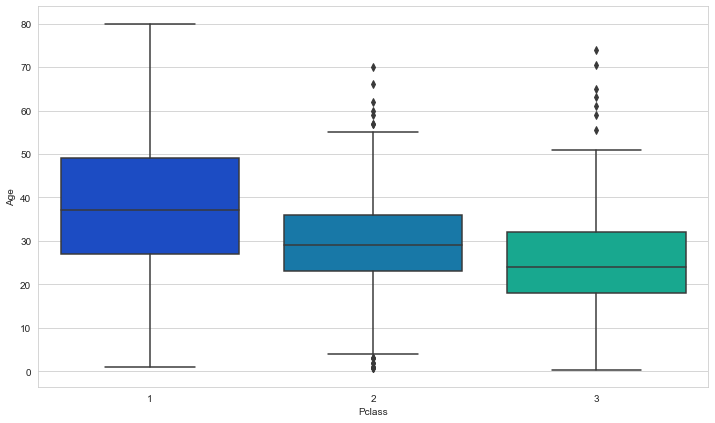

In [45]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Pclass',y = 'Age',data = train,palette='winter')

In [48]:
def imput_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            
            return 37
        
        elif Pclass ==2:
            
            return 29
        
        else:
            
            return 24
        
    else:
        
        return Age

In [49]:
train['Age'] = train[['Age','Pclass']].apply(imput_age,axis =1)

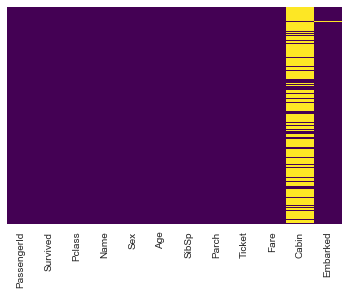

In [50]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')

In [51]:
train.drop('Cabin',axis = 1,inplace = True)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


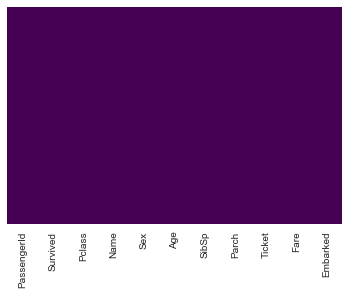

In [54]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')

In [56]:
## Handling the categarical feature using pandas
pd.get_dummies(train['Embarked'],drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [58]:
sex = pd.get_dummies(train['Sex'],drop_first = True).head()
embark = pd.get_dummies(train['Embarked'],drop_first = True).head()

In [59]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace = True)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


# Building a Logistic Regression Model

In [61]:
train.drop('Survived',axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis = 1),train['Survived'],test_size = 30,random_state =101 )

# Training and Predecting

In [64]:
from sklearn.linear_model import LogisticRegression

In [66]:
logModel = LogisticRegression()
logModel.fit(X_train,y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [69]:
prediction = logModel.predict(X_test)
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
accuracy = confusion_matrix(y_test,prediction)

In [72]:
accuracy

array([[16,  4],
       [ 5,  5]], dtype=int64)